# Testing Transport and EOS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from constants import *
from physics import JT_GMS, SMT

from pandas import read_csv
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Transport Coefficients

## Conductivity

#### Carbon from TCCW

#### The following plot is for $\rho=1$ g/cc

In [27]:
Te = np.geomspace(0.1,1e4)/K_to_eV #K
Ti = Te #K

Z, A = 6, 12

m_i = m_p*A

rho = 1e0*1e3 # 
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

ke_tccw_rho1_data = read_csv("/home/zach/plasma/datasets/tccw-1/ke_rho_1e0-g_o_cc.txt", delim_whitespace=True,header=1)
T_data  = ke_tccw_rho1_data['T']/K_to_eV
ke_data = ke_tccw_rho1_data['ke']*erg_to_J*1e2
ke_low_data = ke_tccw_rho1_data['ke_up']*erg_to_J*1e2
ke_up_data = ke_tccw_rho1_data['ke_low']*erg_to_J*1e2


Zstar is:  [1.45620556 1.45705555 1.45811814 1.45944611 1.46110506 1.46317647
 1.46576131 1.46898441 1.47299964 1.47799597 1.48420447 1.49190622
 1.50144108 1.51321715 1.52772096 1.54552851 1.56731834 1.59388944
 1.62619086 1.66537616 1.71290716 1.77074548 1.84168374 1.92985714
 2.04138363 2.18479671 2.37039755 2.60727123 2.89780673 3.2328032
 3.5920403  3.95099879 4.28864741 4.59153553 4.85379301 5.07509931
 5.2584137  5.40823458 5.52949117 5.62692691 5.70480454 5.76680112
 5.81600576 5.85496771 5.88576448 5.91007398 5.92924244 5.94434468
 5.95623568 5.96559357]


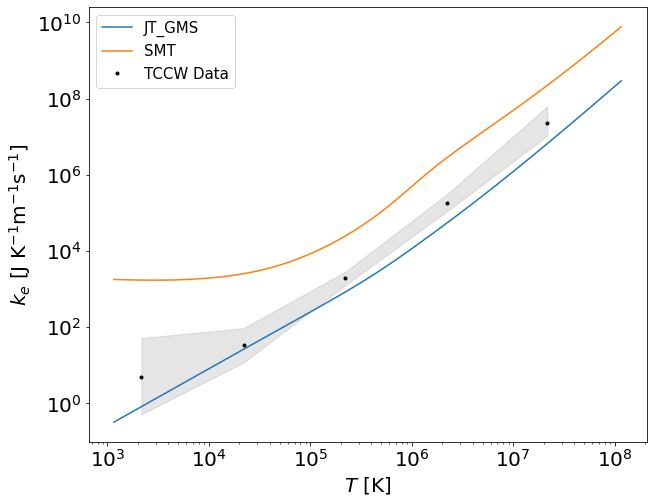

In [28]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='SMT')
ax.plot(T_data, ke_data,'k.', label="TCCW Data")
ax.fill_between(T_data, ke_low_data,ke_up_data,color='k',alpha=0.1)
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax.tick_params(labelsize=20)
ax.legend(fontsize=15)
# ax.grid()

#### The following plot is for $\rho=1$ g/cc

In [29]:
Te = np.geomspace(0.1,1e4)/K_to_eV #K
Ti = Te #K

Z, A = 6, 12
m_i = m_p*A

rho = 1e2*1e3 # 
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3

Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)


ke_tccw_rho1_data = read_csv("/home/zach/plasma/datasets/tccw-1/ke_rho_1e2-g_o_cc.txt", delim_whitespace=True,header=1)
T_data  = ke_tccw_rho1_data['T']/K_to_eV
ke_data = ke_tccw_rho1_data['ke']*erg_to_J*1e2
ke_low_data = ke_tccw_rho1_data['ke_up']*erg_to_J*1e2
ke_up_data = ke_tccw_rho1_data['ke_low']*erg_to_J*1e2


Zstar is:  [4.29830777 4.29831117 4.29831542 4.29832075 4.29832742 4.29833576
 4.29834621 4.29835928 4.29837565 4.29839614 4.29842179 4.2984539
 4.29849412 4.2985445  4.29860764 4.29868684 4.29878633 4.29891161
 4.29906996 4.29927137 4.29953013 4.29986777 4.30031884 4.30094214
 4.30184315 4.30321905 4.30544848 4.30926875 4.31611577 4.32873725
 4.35215548 4.39469663 4.46766233 4.58084174 4.73376093 4.91137453
 5.09191389 5.25832618 5.40236251 5.52243435 5.62036609 5.69922422
 5.76223445 5.81233672 5.85204711 5.88345108 5.90824661 5.92780136
 5.94320943 5.95534198]


Text(0.5, 1.0, '$\\rho=100$[g/cc]')

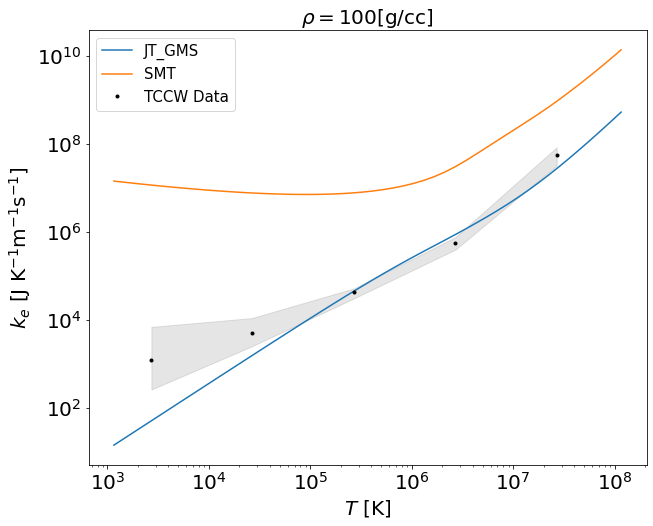

In [30]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='SMT')
ax.plot(T_data, ke_data,'k.', label="TCCW Data")
ax.fill_between(T_data, ke_low_data,ke_up_data,color='k',alpha=0.1)
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax.tick_params(labelsize=20)
ax.legend(fontsize=15)
ax.set_title(r'$\rho=100$[g/cc]',fontsize=20)
# ax.grid()

#### Argon for CLAMS Experiment

In [44]:
Te = np.geomspace(300, 11000) #K
Ti = Te #K

Z, A = 18, 40

m_i = m_p*A

n_i = 6.3e26
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

Zstar is:  [0.22453552 0.22639617 0.22838296 0.23050385 0.23276724 0.23518198
 0.23775737 0.24050319 0.24342975 0.24654781 0.24986871 0.2534043
 0.25716698 0.26116974 0.26542611 0.26995024 0.27475688 0.2798614
 0.28527979 0.29102867 0.29712533 0.3035877  0.31043441 0.31768475
 0.32535872 0.333477   0.34206102 0.3511329  0.36071554 0.37083255
 0.38150833 0.39276803 0.4046376  0.41714377 0.43031408 0.44417689
 0.45876135 0.47409748 0.49021611 0.50714891 0.52492842 0.54358797
 0.56316179 0.5836849  0.60519318 0.6277233  0.65131275 0.6759998
 0.70182346 0.72882348]


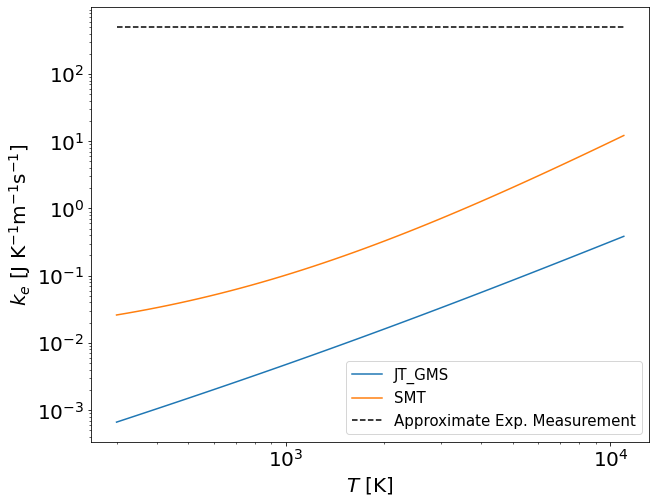

In [50]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='SMT')

dTdt_exp = 350e9 # 350 K/ns
τdiff    = (Te/dTdt_exp) #s
ax.plot(Te, (k_B*n_e*(50e-6)**2/τdiff)[-1]*np.ones_like(Te) ,'k--', label='Approximate Exp. Measurement')

# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax.tick_params(labelsize=20)
ax.legend(fontsize=15)
# ax.grid()